# First Order Differential Equations with One Variable

## Eulers Method

Euler's method is a very simple algorithm. Supposing we know some initial conditions and have description for how a variable changes over time (i.e. a first order differential equation), it is entirely reasonable to approximate the "next step" in a series of changes to that variable as the current value plus the amount we expect it to change by in some step size times the step size.

The time case is perhaps simplest. If I know $\Delta x / \Delta t$, then multiplying by the known $Delta t$ simply leaves $\Delta x$. This is a simplistic explanation, and you may find the Taylor Series explanation more rigorous. But I find intuitive explanations helpful.

The nomenclature in your textbook is to define *f(x, t)* to be a function that computes the derivative at the point $(x, t)$. It can be confusing to think of the *f(x)* as a derivative, without a prime, but programatically this makes perfect sense. After all we only know the expression for the derivative; if we knew the original function we wouldn't be in this mess!

Given the expression ${dx \over dt} = -x^3 + \sin{t}$, or equivalently `f(x,t) = -x**3 + sin(t)`, write a program using Eulers method to solve the differential equation. Use initial conditions $x=0$ at $t=0$, for $t=0$ to $t=10$ and 1000 steps. Plot the result.

As usual there is an answer in your book, but it is more instructive to attempt to code on your own first.

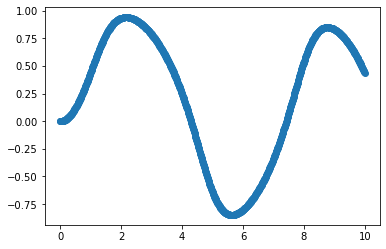

In [7]:
# code
import numpy as np
from matplotlib import pyplot as plt
def myFunction(x,t):
    return -x**3 + np.sin(t)

x = 0
t0 = 0
tf = 10
N = 1000
h = (tf-t0)/N
timeVals = np.arange(t0,tf,h)
xVals = []

for i in timeVals:
    xVals.append(x)
    x = x + h * myFunction(x,i)

plt.figure()
plt.scatter(timeVals,xVals) 
plt.show()


## Runge-Kutta

You should have read a detailed explanation of Runge-Kutta already. You read that Euler's method is effectively a first-order Runge-Kutta method. I find the simplest way of conceptualizing the traditional "second order" Runge-Kutta is to think of it as a "mid point" rule; Figure 8.2 is quite instructive. Recall that when computing derivatives, we found evaluating the derivative at a "mid point" was far more accurate.

Equation 8.13 in your book gives the procedure for calculating second-order Runge-Kutta. The first step is basically Euler's method, but instead we use 1/2 of the resulting change in $x$ and a similar 1/2 our time step, $t$, to calculate the $\Delta x / \Delta t$ at a point between the current point and next point, and multiply this more accurate $\Delta x / \Delta t$ by our step size to find the next point.

Beginning with a copy of your Euler's Method code, update the code to use second-order Runge-Kutta. Again, the code is provided in your book, but given 8.13 you should be able to write your own code. 

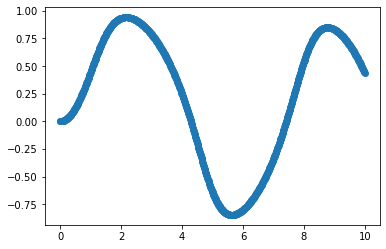

In [8]:
# code
x = 0
t0 = 0
tf = 10
h = (tf-t0)/N
timeVals = np.arange(t0,tf,h)
xVals = []

for i in timeVals:
    xVals.append(x)
    k1 = h * myFunction(x,i)
    k2 = h * myFunction(x + 1/2*k1, i + 0.5*h)
    x = x + k2

plt.figure()
plt.scatter(timeVals,xVals) 
plt.show()

## Fourth-Order Runge-Kutta

Equation 8.17 gives the procedure for calculating a fourth-order Runge-Kutta. Instead of one midpoint, now we use 3. You should see why these three methods are generally grouped together.

Beginning with a copy of your second-order Runge-Kutta code, update it to use fourth-order Runge-Kutta. Once your code is working, further modify your code to use different numbers of steps (or equivalently different step sizes). Create plots of the solution for $x$ with 10, 100, and 1000 step sizes. Feel free to try 10,000 or more steps, but do you see any further improvement?

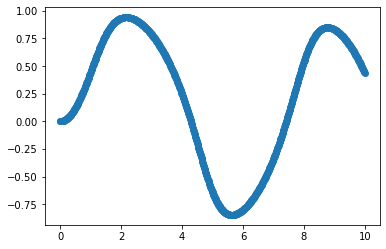

In [9]:
# code
x = 0
t0 = 0
tf = 10
h = (tf-t0)/N
timeVals = np.arange(t0,tf,h)
xVals = []

for i in timeVals:
    xVals.append(x)
    k1 = h * myFunction(x,i)
    k2 = h * myFunction(x + 1/2*k1, i + 0.5*h)
    k3 =  h * myFunction(x + 1/2*k2, i + 0.5*h)
    k4 = h * myFunction(x + k3, i + h)
    x = x + 1/6 * (k1 + 2*k2 + 2*k3 + k4)

plt.figure()
plt.scatter(timeVals,xVals) 
plt.show()
